In [1]:
"""
In this notebook I will look at the chat data:
- Count distinct websites, agents, chats per agent
- Compute mean rating per website
- Compute mean rating per agent
- Analyze languages used in chats
"""
import pandas as pd

In [2]:
"""
Load data
"""
df = pd.read_csv('data/1495632785372-chats-export.csv')
df.head()

,sessionId,website,entryPage,exitPage,agentName,agentAlias,datetime,duration,messagesCount,agentRating,companyRating,clientRating,transcript,lead
0,1495632441291,www.crowdio.com,https://crowdio.com/agent_faq/,https://crowdio.com/agent_faq/,Nikolaj Nielsen,Nikolaj,24-05-2017 13:27:21,00:02:14,6,NaN,NaN,NaN,CSR: Welcome to Crowdio. How can we help?\nVis...,NaN
1,1495631904893,www.SimplyGo.dk,https://simplygo.dk/hyundai-leasing?gclid=CM3x...,https://simplygo.dk/fordele-ved-simplygo-leasing,Martin Nydahl,Martin,24-05-2017 13:18:24,00:02:45,8,NaN,NaN,NaN,CSR: Velkommen til. Har du sp&oslash;rgsm&arin...,NaN
2,1495631613207,www.SimplyGo.dk,https://simplygo.dk/,https://simplygo.dk/,Martin Nydahl,Martin,24-05-2017 13:13:33,00:01:43,7,NaN,NaN,NaN,CSR: Velkommen til. Har du sp&oslash;rgsm&arin...,NaN
3,1495631289125,www.mycruise.dk,http://www.mycruise.dk/skibe-og-rederier/costa...,http://www.mycruise.dk/alt-om-krydstogt/pak-di...,Kasper Knudsen,Kasper,24-05-2017 13:08:09,00:10:09,4,NaN,NaN,NaN,"CSR: Hej, sig endelig til, hvis du har sp&osla...",NaN
4,1495630780502,www.essentialfoods.se,https://www.essentialfoods.se/,https://www.essentialfoods.se/contacts,Kasper Knudsen,Kasper,24-05-2017 12:59:40,00:03:21,10,4.0,4.0,NaN,CSR: Funderar du p&aring; att byta till ESSENT...,NaN


In [3]:
# Counting stuff
print('Row count:', len(df))
print('Percentage of rows with company rating:', df.companyRating.notnull().sum() / len(df))
print('Percentage of rows with client rating:', df.clientRating.notnull().sum() / len(df))
print('Distinct websites:', len(df.website.unique()))
print('Distinct agents:', len(df.agentName.unique()))
print()
print('(Chats handled per agent top 10)')
print(df.groupby('agentName').size().sort_values(ascending=False).head(10))


Row count: 7541
Percentage of rows with company rating: 0.267868982894
Percentage of rows with client rating: 0.00782389603501
Distinct websites: 83
Distinct agents: 106

(Chats handled per agent top 10)
agentName
Martin Nydahl         1681
Asim Malik            1230
Ole  Boye Pedersen     569
Kasper Knudsen         446
Ulrik Seidelin         407
Jens F                 383
Peter                  322
Enver Arabaci          317
Frederik Lund          279
CY Khoo                269
dtype: int64


In [4]:
"""
See a few transcripts
"""
transcripts = [t.split('\n') for t in df.transcript]
transcripts[0:3]

[['CSR: Welcome to Crowdio. How can we help?',
  'Visitor: just checking this out',
  'CSR: Hi, just got your message...',
  'CSR: You are welcome :)',
  'CSR: Let me know if you have any questions :)',
  ''],
 ['CSR: Velkommen til. Har du sp&oslash;rgsm&aring;l, s&aring; kan du chatte med os her.',
  'Visitor: Får i flere i30 på lager igen?',
  'CSR: Hej, har lige fået din besked...',
  'CSR: God eftermiddag',
  'CSR: Det har jeg ikke info på desværre - men har du tilmeldt dig vores nyhedsbrev? så får du altid nyhed omkring tilføjelser og opdateringer af vores sortiment som en af de første :)',
  'Visitor: Tak',
  'CSR: Det var så lidt :) hav en rigtig god dag',
  ''],
 ['CSR: Velkommen til. Har du sp&oslash;rgsm&aring;l, s&aring; kan du chatte med os her.',
  'Visitor: Har I nogen cabriolet-biler ledige?',
  'CSR: Hej, har lige fået din besked...',
  'CSR: God eftermiddag',
  'CSR: Vi har altid kun de biler som vises på hjemmesiden - du kan se udvalget ved at trykke på en af de tre r

In [32]:
"""
positive/negative reviews
"""
print(len(df[df.companyRating <= 3]))
print(len(df[df.companyRating > 3]))
print(len(df[df.clientRating == 'Good']))
print(len(df[df.clientRating == 'Bad']))

631
1389
45
14


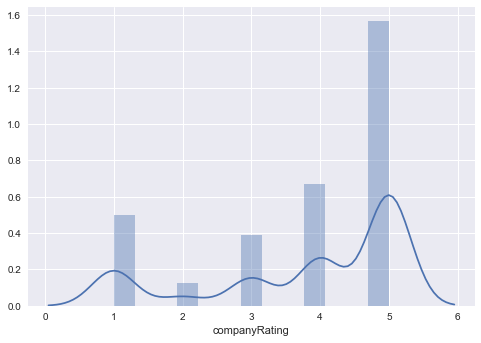

In [33]:
"""
Distribution of companyRating
- http://seaborn.pydata.org/tutorial/distributions.html
"""
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
x = df.companyRating.dropna()
sns.distplot(x)

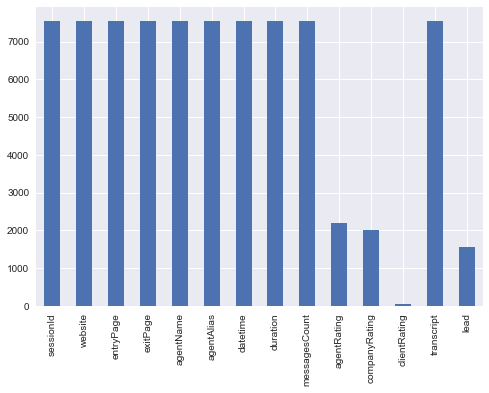

In [36]:
df.count().plot(kind='bar')